 ## Exploratory Data Analysis

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [109]:
try:
    df = pd.read_csv('../data/processed_data.csv')
    print("CSV file loaded successfully!")
except FileNotFoundError:
    print("Error: 'processed_data.csv' not found. Please make sure the file is in the same directory as your notebook or provide the correct path.")
    exit()

CSV file loaded successfully!


In [111]:
print(df.head())

   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2        

### Define student performance matrics with the most importance features

In [114]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# STEP 1: Pick your top features
top_features = ['anxiety_level', 'stress_level', 'headache', 'safety',
                'blood_pressure', 'teacher_student_relationship', 'bullying', 'academic_performance' , 'extracurricular_activities' ]

# STEP 2: Scale your data (MinMaxScaler to keep it 0-1 for easier plots)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[top_features + ['sleep_quality']]),
                         columns=top_features + ['sleep_quality'])

print(df_scaled.head())

   anxiety_level  stress_level  headache  safety  blood_pressure  \
0       0.666667           0.5       0.4     0.6             0.0   
1       0.714286           1.0       1.0     0.4             1.0   
2       0.571429           0.5       0.4     0.6             0.0   
3       0.761905           1.0       0.8     0.4             1.0   
4       0.761905           0.5       0.4     0.8             1.0   

   teacher_student_relationship  bullying  academic_performance  \
0                           0.6       0.4                   0.6   
1                           0.2       1.0                   0.2   
2                           0.6       0.4                   0.4   
3                           0.2       1.0                   0.4   
4                           0.2       1.0                   0.8   

   extracurricular_activities  sleep_quality  
0                         0.6            0.4  
1                         1.0            0.2  
2                         0.4            0.4  


### Creating a Composite Student Performance Score Using Feature Engineering + PLS Regression
This code does two key things:
- Combines related features (like mental health, relationships, physical health) into new grouped variables.
- Uses PLS Regression to create a new student performance score that best explains academic performance using those combined features.

In [117]:
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
# STEP 3: Create feature combos (engineering)
df_scaled['mentalHealth'] = df_scaled['anxiety_level'] + df_scaled['stress_level']
df_scaled['relationship'] = df_scaled['teacher_student_relationship'] + df_scaled['academic_performance']
df_scaled['phihealth'] = df_scaled['headache'] + df_scaled['blood_pressure']
df_scaled['acedemic_positive'] = df_scaled['extracurricular_activities']
df_scaled['acedemic_negative'] = df_scaled['bullying']

pls = PLSRegression(n_components=1)
df_scaled['student_performance_pls'] = pls.fit_transform(
    df_scaled[['mentalHealth', 'relationship', 'phihealth', 'acedemic_positive', 'acedemic_negative']],
    df_scaled[['academic_performance']]
)[0]

print(df_scaled.head())

   anxiety_level  stress_level  headache  safety  blood_pressure  \
0       0.666667           0.5       0.4     0.6             0.0   
1       0.714286           1.0       1.0     0.4             1.0   
2       0.571429           0.5       0.4     0.6             0.0   
3       0.761905           1.0       0.8     0.4             1.0   
4       0.761905           0.5       0.4     0.8             1.0   

   teacher_student_relationship  bullying  academic_performance  \
0                           0.6       0.4                   0.6   
1                           0.2       1.0                   0.2   
2                           0.6       0.4                   0.4   
3                           0.2       1.0                   0.4   
4                           0.2       1.0                   0.8   

   extracurricular_activities  sleep_quality  mentalHealth  relationship  \
0                         0.6            0.4      1.166667           1.2   
1                         1.0       

## Correlation Matrix Heatmap

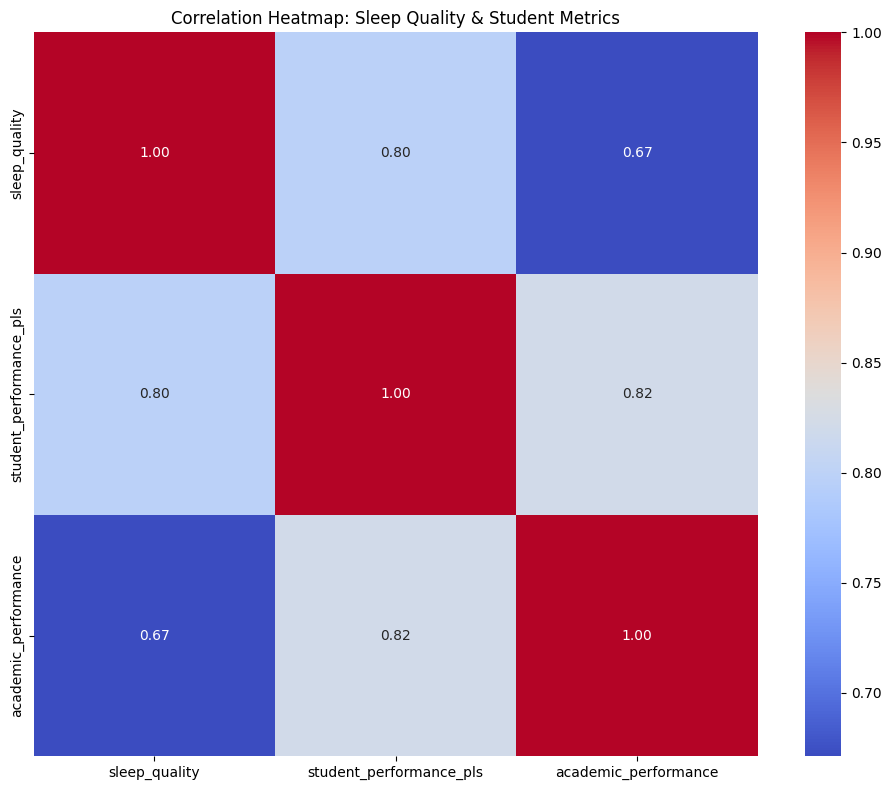

In [120]:
# Select the features you want to analyze
heatmap_features = ['sleep_quality', 'student_performance_pls' ,'academic_performance']  # Add your performance column if not included

# Compute correlation matrix
corr_matrix = df_scaled[heatmap_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap: Sleep Quality & Student Metrics")
plt.tight_layout()
plt.show()


## which cluster count gives the best silhouette score.

C:\Users\Ethan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Ethan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Ethan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Ethan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

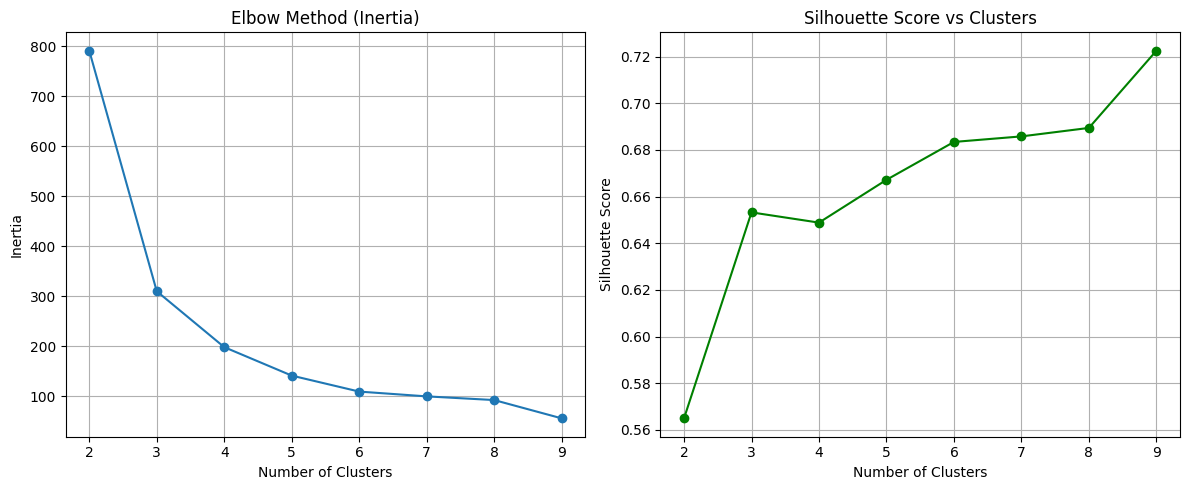

Best number of clusters by Silhouette Score: 9


In [123]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Select the features for clustering
features = ['sleep_quality', 'student_performance_pls']
X_cluster = df_scaled[features]

# You already standardized the data earlier, so reuse X_scaled
# But if not, you can standardize here:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_cluster)

# Range of cluster numbers to test
cluster_range = range(2, 10)  # Try 2 to 9 clusters
inertias = []
silhouette_scores = []

# Try each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    inertias.append(kmeans.inertia_)
    silhouette = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette)

# Plot Inertia (Elbow Method)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertias, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print the best score
best_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f'Best number of clusters by Silhouette Score: {best_k}')


## Apply Clustering to Understand Types of Students

C:\Users\Ethan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


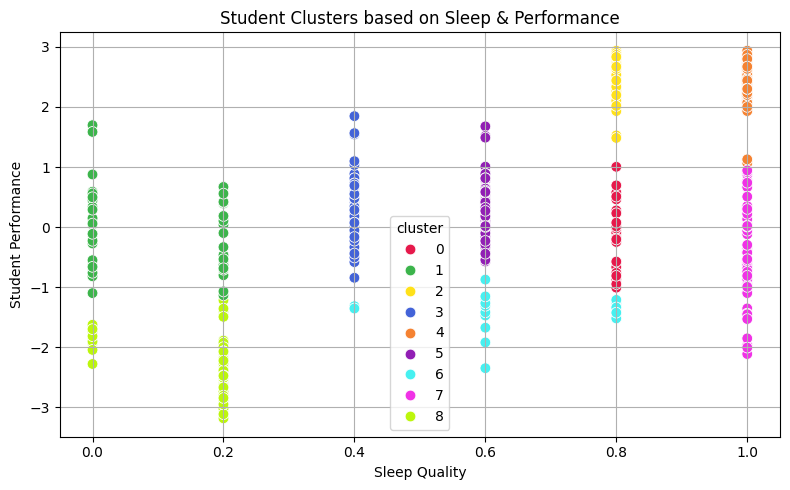


Cluster Summary (average values):
         sleep_quality  student_performance_pls
cluster                                        
0             0.800000                -0.159340
1             0.091667                -0.076150
2             0.800000                 2.418214
3             0.400000                 0.297576
4             1.000000                 2.397418
5             0.600000                 0.277853
6             0.640000                -1.405160
7             1.000000                -0.418813
8             0.194904                -2.482668


In [125]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select features to cluster on
features = ['sleep_quality', 'student_performance_pls']
X_cluster = df_scaled[features]

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Step 3: Fit K-Means with 9 clusters
kmeans = KMeans(n_clusters=9, random_state=42)
df_scaled['cluster'] = kmeans.fit_predict(X_scaled)

# ✅ Step 4: Manual color palette (high-contrast and color-blind–friendly)
manual_palette = {
    0: '#e6194b',  # red
    1: '#3cb44b',  # green
    2: '#ffe119',  # yellow
    3: '#4363d8',  # blue
    4: '#f58231',  # orange
    5: '#911eb4',  # purple
    6: '#46f0f0',  # cyan
    7: '#f032e6',  # pink
    8: '#bcf60c'   # lime green
}

# Step 5: Plot the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_scaled,
    x='sleep_quality',
    y='student_performance_pls',
    hue='cluster',
    palette=manual_palette,
    s=60
)
plt.title('Student Clusters based on Sleep & Performance')
plt.xlabel('Sleep Quality')
plt.ylabel('Student Performance')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Print cluster summary
cluster_summary = df_scaled.groupby('cluster')[features].mean()
print("\nCluster Summary (average values):")
print(cluster_summary)


## Cluster Distribution

Cluster Distribution (Counts):
cluster
0     25
1     48
2    157
3    186
4    148
5    158
6     20
7     44
8    314
Name: count, dtype: int64

Cluster Distribution (Percentages):
cluster
0     2.272727
1     4.363636
2    14.272727
3    16.909091
4    13.454545
5    14.363636
6     1.818182
7     4.000000
8    28.545455
Name: proportion, dtype: float64


C:\Users\Ethan\AppData\Local\Temp\ipykernel_26980\921782848.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')


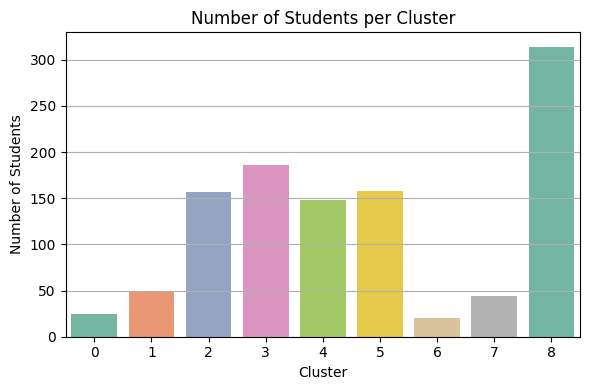

In [129]:
# Task 1: Cluster Distribution
cluster_counts = df_scaled['cluster'].value_counts().sort_index()
cluster_percentages = df_scaled['cluster'].value_counts(normalize=True).sort_index() * 100

# Display results
print("Cluster Distribution (Counts):")
print(cluster_counts)
print("\nCluster Distribution (Percentages):")
print(cluster_percentages)

# Optional: Visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')
plt.title("Number of Students per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Students")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Cluster Evaluation (Silhouette Score & Inertia)

In [132]:
from sklearn.metrics import silhouette_score

# Task 2: Cluster Evaluation
# Calculate Silhouette Score
silhouette = silhouette_score(X_scaled, df_scaled['cluster'])
print(f"Silhouette Score: {silhouette:.4f}")

# Inertia (within-cluster sum of squares)
inertia = kmeans.inertia_
print(f"Inertia: {inertia:.4f}")


Silhouette Score: 0.7225
Inertia: 55.9451


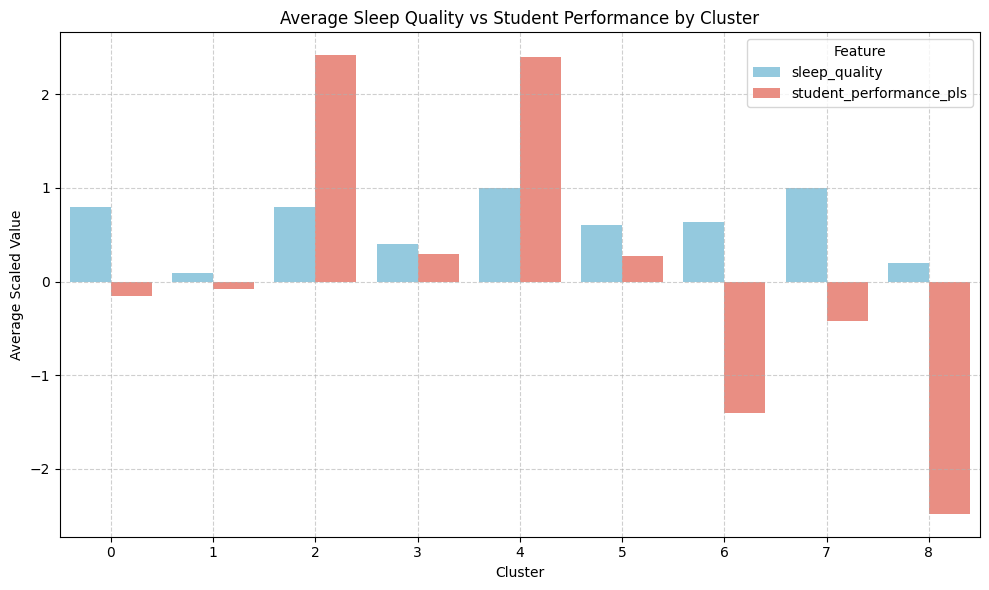

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Use your existing cluster_summary table
# If not available, calculate it again:
features = ['sleep_quality', 'student_performance_pls']
cluster_summary = df_scaled.groupby('cluster')[features].mean().reset_index()

# Step 2: Reshape for side-by-side plotting
cluster_melted = cluster_summary.melt(id_vars='cluster', 
                                      value_vars=features, 
                                      var_name='Feature', 
                                      value_name='Average Value')

# Step 3: Side-by-side bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=cluster_melted,
    x='cluster',
    y='Average Value',
    hue='Feature',
    palette=['skyblue', 'salmon']
)

plt.title("Average Sleep Quality vs Student Performance by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Scaled Value")
plt.legend(title="Feature")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [136]:
# Define tagging function
def tag_cluster(row):
    sleep = row['sleep_quality']
    performance = row['student_performance_pls']
    
    # You can adjust these thresholds as needed
    if sleep < 0.4 and performance < -1:
        return '🚨 At-Risk (Low Sleep + Low Perform)'
    elif sleep >= 0.8 and performance > 1:
        return '🌟 High Performer (Well-Rested)'
    elif sleep > 0.6 and performance < -1:
        return '😴 Well-Rested but Underperforming'
    elif sleep < 0.4 and performance > -1:
        return '⚡ Sleepless Achiever'
    else:
        return '🟢 Balanced / Moderate'

# Apply to your cluster summary
cluster_summary['tag'] = cluster_summary.apply(tag_cluster, axis=1)

# Show the tagged table
print(cluster_summary[['cluster', 'sleep_quality', 'student_performance_pls', 'tag']])

   cluster  sleep_quality  student_performance_pls  \
0        0       0.800000                -0.159340   
1        1       0.091667                -0.076150   
2        2       0.800000                 2.418214   
3        3       0.400000                 0.297576   
4        4       1.000000                 2.397418   
5        5       0.600000                 0.277853   
6        6       0.640000                -1.405160   
7        7       1.000000                -0.418813   
8        8       0.194904                -2.482668   

                                   tag  
0                🟢 Balanced / Moderate  
1                 ⚡ Sleepless Achiever  
2       🌟 High Performer (Well-Rested)  
3                🟢 Balanced / Moderate  
4       🌟 High Performer (Well-Rested)  
5                🟢 Balanced / Moderate  
6    😴 Well-Rested but Underperforming  
7                🟢 Balanced / Moderate  
8  🚨 At-Risk (Low Sleep + Low Perform)  


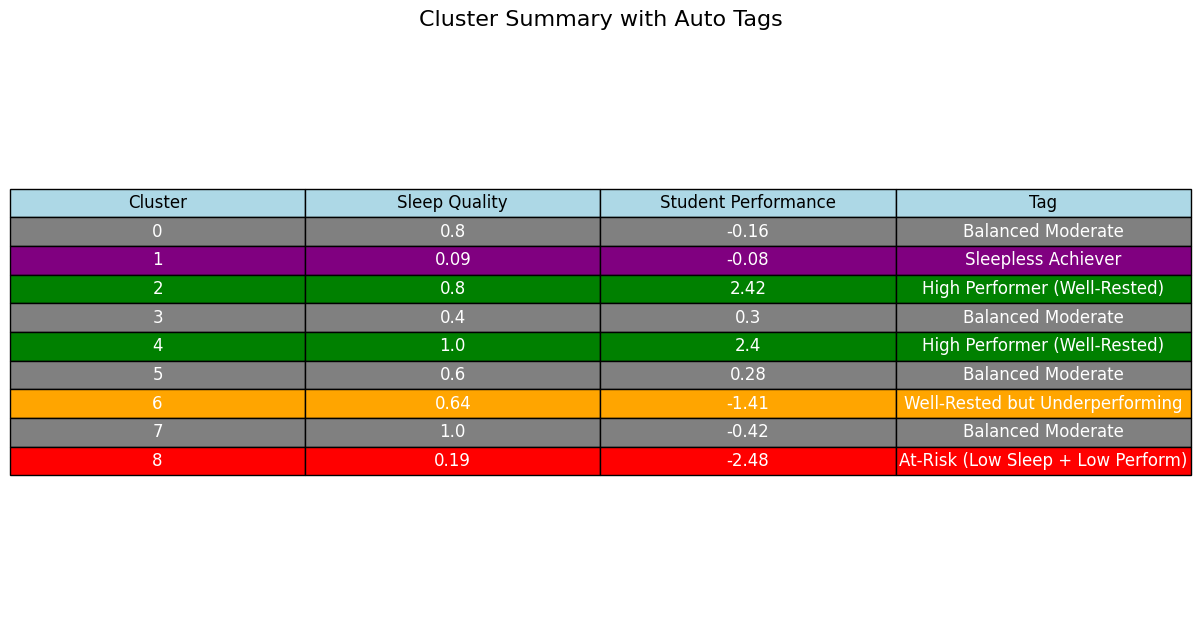

In [138]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample cluster_summary for testing (remove this when using your real data)
# cluster_summary = pd.read_csv("your_summary.csv")  # Replace with your actual data if needed

# STEP 1: Improved Clean Tags
def remove_emojis(text):
    import re
    cleaned = re.sub(r'[^\w\s\(\)\-\+]', '', text)  # keep + and - signs
    return ' '.join(cleaned.strip().split())  # remove double/multiple spaces

cluster_summary['tag_clean'] = cluster_summary['tag'].apply(remove_emojis)

# STEP 2: Define color map using cleaned tags (no emojis here!)
tag_color_map_clean = {
    'At-Risk (Low Sleep + Low Perform)': 'red',
    'High Performer (Well-Rested)': 'green',
    'Well-Rested but Underperforming': 'orange',
    'Sleepless Achiever': 'purple',
    'Slightly Above Average': 'lightgreen',
    'Slightly At-Risk (Below Median)': 'gold',
    'Balanced / Moderate': 'gray'
}

# STEP 3: Apply color map
cluster_summary['color'] = cluster_summary['tag_clean'].apply(lambda tag: tag_color_map_clean.get(tag, 'gray'))


# STEP 4: Create the colored summary table
fig, ax = plt.subplots(figsize=(12, len(cluster_summary) * 0.7))
ax.axis('off')
ax.axis('tight')

# Select columns to show (with cleaned tag)
table_data = cluster_summary[['cluster', 'sleep_quality', 'student_performance_pls', 'tag_clean']].copy()
table_data = table_data.round(2)
table_data.columns = ['Cluster', 'Sleep Quality', 'Student Performance', 'Tag']  # Rename for display

# Create table in the plot
table = ax.table(
    cellText=table_data.values,
    colLabels=table_data.columns,
    loc='center',
    cellLoc='center',
    colColours=['lightblue'] * len(table_data.columns)
)

# Apply row colors
for i in range(len(table_data)):
    color = cluster_summary.iloc[i]['color']
    for j in range(len(table_data.columns)):
        table[(i + 1, j)].set_facecolor(color)
        table[(i + 1, j)].set_text_props(color='white')

# Styling
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

plt.title("Cluster Summary with Auto Tags", fontsize=16, pad=20)
plt.tight_layout()
plt.show()


## Line Plot 

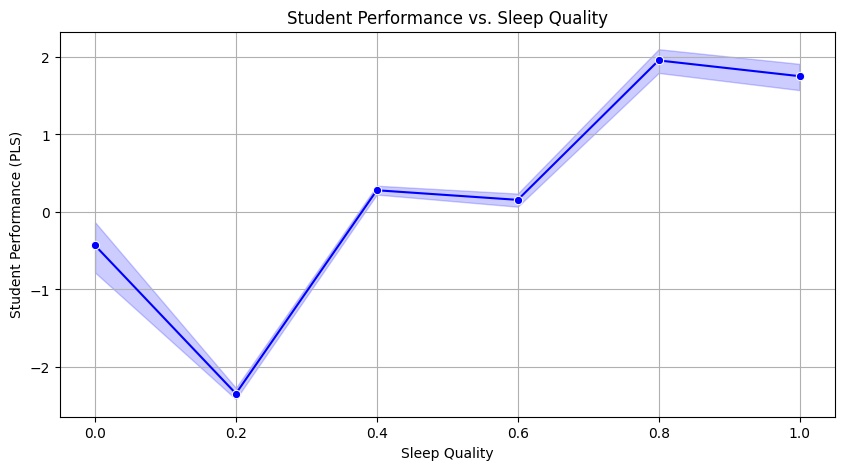

In [141]:
plt.figure(figsize=(10, 5))
sorted_df = df_scaled.sort_values('sleep_quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Student Performance (PLS)')
plt.title('Student Performance vs. Sleep Quality')

# Create line plot with Seaborn
sns.lineplot(
    data=sorted_df,
    x='sleep_quality',
    y='student_performance_pls',
    marker='o',  # optional: show data points
    color='blue'
)
# Show the plot
plt.grid(True)  # Optional: Add grid lines for better readability
plt.show()



## Scatter Plot
### Train a model to predict student performance from sleep quality

📊 MAE: 0.547
📈 R² Score: 0.808


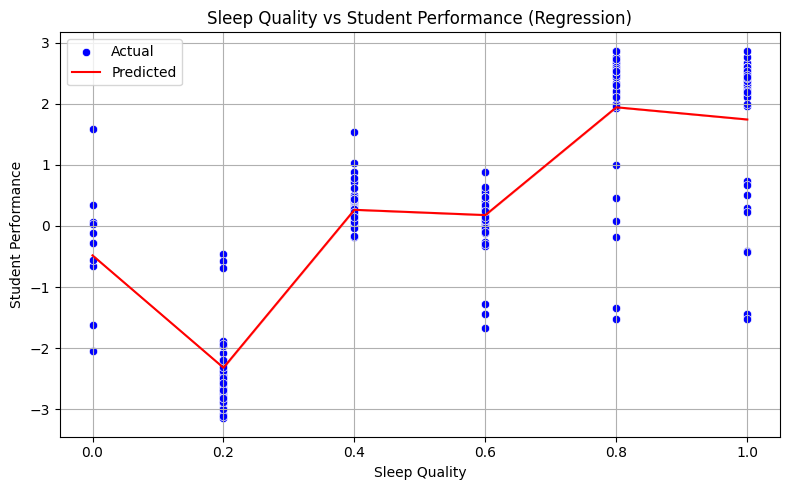

In [148]:
# Assuming df_scaled has 'sleep_quality' and 'student_performance_pls'

# Step 1: Define features and target
X = df_scaled[['sleep_quality']]
y = df_scaled['student_performance_pls']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Best parameters from GridSearchCV
best_params = {
    'learning_rate': 0.01,
    'max_depth': 3,
    'min_samples_leaf': 4,
    'min_samples_split': 10,
    'n_estimators': 300,
    'subsample': 1.0
}

# ✅ Train GradientBoosting model
# Random Forest with tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
}
rf_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=5, cv=3, random_state=42)
rf_search.fit(X_train, y_train)

rf_best = rf_search.best_estimator_
y_pred_rf = rf_best.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"📊 MAE: {mae_rf:.3f}")
print(f"📈 R² Score: {r2_rf:.3f}")

# Step 6: Visualize the regression
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['sleep_quality'], y=y_test, label='Actual', color='blue')
sns.lineplot(x=X_test['sleep_quality'], y=y_pred_rf, label='Predicted', color='red')
plt.title('Sleep Quality vs Student Performance (Regression)')
plt.xlabel('Sleep Quality')
plt.ylabel('Student Performance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Don't use This part.

## Build a Risk Alert System for Students with Bad Sleep
- Automatically flag students who are at risk because they have poor sleep quality and low performance.

In [41]:
# # You define your own thresholds based on domain understanding or data distribution
# SLEEP_THRESHOLD = 0.4        # Below this = poor sleep
# PERFORMANCE_THRESHOLD = 0.3  # Below this = low performance

# # Create risk flag
# df_scaled['risk_flag'] = df_scaled.apply(
#     lambda row: '⚠️ At Risk' if row['sleep_quality'] < SLEEP_THRESHOLD and row['student_performance_pls'] < PERFORMANCE_THRESHOLD 
#     else '✅ Safe',
#     axis=1
# )

# # See the counts
# print(df_scaled['risk_flag'].value_counts())

# # Optional: View risky students
# risky_students = df_scaled[df_scaled['risk_flag'] == '⚠️ At Risk']
# # print(risky_students.head())


# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(8, 5))
# sns.scatterplot(data=df_scaled, x='sleep_quality', y='student_performance_pls', hue='risk_flag', palette={'⚠️ At Risk': 'red', '✅ Safe': 'green'})
# plt.title('Risk Alert System: Sleep vs Performance')
# plt.xlabel('Sleep Quality')
# plt.ylabel('Student Performance')
# plt.grid(True)
# plt.tight_layout()
# plt.show()



## Side-by-Side Bar Plot
- find patterns or risky lifestyles:
  - Students who **perform well but sleep poorly** might be pushing too hard (🚩 burnout risk).
  - Students who **sleep well but perform poorly** might not be studying enough or face other issues.
  - Others are in a mixed/normal category.
- So this code helps you categorize students based on performance vs sleep, not on how long they study.

In [43]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Median and mean values you provided
# performance_median = df_scaled['student_performance_pls'].median()
# sleep_median = df_scaled['sleep_quality'].median()  # we'll calculate this from data

# # Define groups based on performance and sleep quality
# def classify_student(row):
#     if row['student_performance_pls'] > performance_median and row['sleep_quality'] < sleep_median:
#         return 'High performance + Poor Sleep'
#     elif row['student_performance_pls'] < performance_median and row['sleep_quality'] > sleep_median:
#         return 'Low performance + Good Sleep'
#     else:
#         return 'Others'

# # Apply classification
# df_scaled['group'] = df_scaled.apply(classify_student, axis=1)

# # Print how many students in each group
# print(df_scaled['group'].value_counts())

# # Scatter plot
# plt.figure(figsize=(9, 6))
# sns.scatterplot(
#     data=df_scaled,
#     x='sleep_quality',
#     y='student_performance_pls',
#     hue='group',
#     palette={'High performance + Poor Sleep': 'red', 
#              'Low performance + Good Sleep': 'green', 
#              'Others': 'gray'},
#     style='group',
#     s=100
# )

# # Add median lines for reference
# plt.axhline(performance_median, color='blue', linestyle='--', label='Performance Median')
# plt.axvline(sleep_median, color='purple', linestyle='--', label='Sleep Median')

# plt.title("Sleep Quality vs Student Performance by Group")
# plt.xlabel("Sleep Quality")
# plt.ylabel("Student Performance (PLS)")
# plt.legend(title='Student Group', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()
